In [2]:
import pandas as pd

# Creating a combined DataFrame

In [3]:
dfs = []

for i in range(12, 71):
    # Skip match_id 46
    if i == 46:
        continue

    # Read labels and features data
    labels_file = f'./Data/FilesUsed/test_file_labels_matchid_{i}.csv'
    features_file = f'./Data/FilesUsed/test_file_matchid_{i}.csv'

    labels = pd.read_csv(labels_file)
    features = pd.read_csv(features_file)

    # Remove the first column from features
    features = features.iloc[:, 1:]

    # Add 'total_runs' column from labels
    features['total_runs'] = labels['actual_runs']

    # Insert 'match_id' column at the beginning
    features.insert(loc=0, column='match_id', value=i)

    dfs.append(features)

In [4]:
combined_df = pd.concat(dfs, axis=0, ignore_index=True)

In [5]:
len(dfs)
combined_df

58

,match_id,venue,innings,batting_team,bowling_team,batsmen,bowlers,total_runs
0,12,"Wankhede Stadium , Mumbai",1,Mumbai Indians,Chennai Super Kings,"RG Sharma, Ishan Kishan, Cameron Green","DL Chahar, TU Deshpande, Sisanda Magala, MJ Sa...",61.0
1,12,"Wankhede Stadium , Mumbai",2,Chennai Super Kings,Mumbai Indians,"DP Conway, AM Rahane, RD Gaikwad","JP Behrendorff, Mohd Arsad Khan, Cameron Green...",68.0
2,13,"Narendra Modi Stadium, Ahmedabad",1,Gujarat Titans,Kolkata Knight Riders,"WP Saha, Shubman Gill, Sai Sudharsan","UT Yadav, SN Thakur, LH Ferguson, SP Narine, C...",54.0
3,13,"Narendra Modi Stadium, Ahmedabad",2,Kolkata Knight Riders,Gujarat Titans,"Rahmanullah Gurbaz, N Jagadeesan, Venkatesh Iy...","Mohammed Shami, Joshua Little, AS Joseph",43.0
4,14,"Rajiv Gandhi International Stadium, Hyderabad",1,Punjab Kings,Punjab Kings,"P Simran Singh,S Dhawan, DJM Short, Jitesh Sha...","B Kumar, M Jansen, T Natarajan",41.0
...,...,...,...,...,...,...,...,...
111,68,"Eden Gardens, Kolkata",2,Kolkata Knight Riders,Lucknow Super Giants,"JJ Roy, VR Iyer, N Rana","Mohsin Khan, Naveen Ul Haq, KH Pandya, K Gowtham",61.0
112,69,"Wankhede Stadium, Mumbai",1,Sunrisers Hyderabad,Mumbai Indians,"MA Agarwal, Vivrant Sharma","JP Behrendroff, Cameron Green, Akash Madhwal, ...",53.0
113,69,"Wankhede Stadium, Mumbai",2,Mumbai Indians,Sunrisers Hyderabad,"RG Sharma, I Kishan, Cameron Green","B Kumar, Nitish Kumar Reddy, Mayank Dagar, Kar...",60.0
114,70,"M.Chinnaswamy Stadium, Bengaluru",1,Royal Challengers Bangalore,Gujarat Titans,"F du Plessis, V Kohli","Mohammed Shami, Yash Dayal, Rashid Khan, Noor ...",62.0


In [6]:
combined_df.to_csv('./Data/TestData.csv', index=False)

# Looking into data

In [7]:
sorted(combined_df['venue'].unique())

[' Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
 ' M.Chinnaswamy Stadium, Bengaluru ',
 ' Rajiv Gandhi International Stadium, Hyderabad ',
 'Arun Jaitley Stadium, Delhi',
 'Arun Jaitley Stadium, Delhi ',
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
 'Eden Gardens, Kolkata',
 'Himachal Pradesh Cricket Association Stadium, Dharamsala',
 'M Chinnaswamy Stadium, Bengaluru',
 'M.Chinnaswamy Stadium, Bangalore',
 'M.Chinnaswamy Stadium, Bengaluru',
 'M.Chinnaswamy Stadium, Bengaluru ',
 'MA Chidambaram Stadium, Chennai',
 'MA Chidambaram Stadium, Chennai ',
 'Narendra Modi Stadium, Ahmedabad',
 'Punjab Cricket Association IS Bindra Stadium, Mohali',
 'Punjab Cricket Association IS Bindra Stadium, Mohali ',
 'Punjab Cricket Association IS Bindra Stadium,Chandigarh',
 'Rajiv Gandhi International Stadium, Hyderabad',
 'Rajiv Gandhi International Stadium, Hyderabad ',
 'Sawai Mansingh Stadium, Jaipur',
 'Sawai Mansingh Stadium, Jaipur ',
 '

In [8]:
len(combined_df['batting_team'].unique())
sorted(combined_df['batting_team'].unique())

10

['Chennai Super Kings',
 'Delhi Capitals',
 'Gujarat Titans',
 'Kolkata Knight Riders',
 'Lucknow Super Giants',
 'Mumbai Indians',
 'Punjab Kings',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [16]:
import matplotlib.pyplot as plt


def plot_total_runs():
    bin_max = int(max(combined_df['total_runs']) + 6)

    _ = plt.hist(combined_df['total_runs'], bins=range(
        0, bin_max, 5), edgecolor='black')

    _ = plt.title('Histogram of Total Runs')
    _ = plt.xlabel('Total Runs')
    _ = plt.ylabel('Frequency')
    _ = plt.grid(axis='y', alpha=0.75)

    _ = plt.show()

# Plotting histogram of total runs

count    116.000000
mean      51.948276
std       11.418402
min       26.000000
25%       45.000000
50%       52.500000
75%       60.250000
max       78.000000
Name: total_runs, dtype: float64

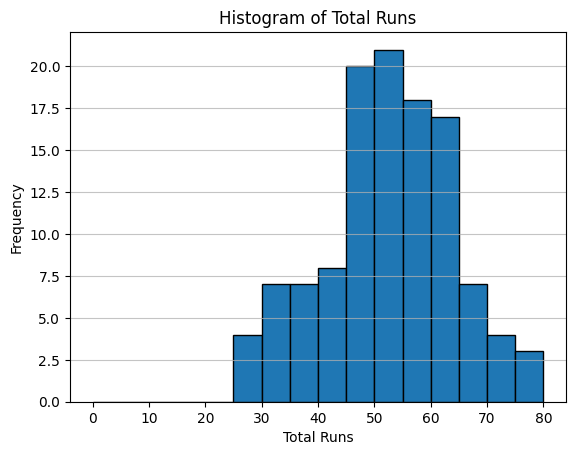

In [18]:
combined_df['total_runs'].describe()
plot_total_runs()